### Importar Bibliotecas e Bases de Dados

In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split

In [2]:
warnings.filterwarnings('ignore')
meses = {'jan':1,'fev':2,'mar':3,'abr':4,'mai':5,'jun':6,'jul':7,'ago':8,'set':9,'out':10,'nov':11,'dez':12}
caminho_dados = Path('dataset')

data_base = pd.DataFrame()

for arquivo in caminho_dados.iterdir():
    mes = meses[arquivo.name[:3]]

    ano = arquivo.name[-8:]
    ano = int(ano.replace('.csv', ''))

    df = pd.read_csv(caminho_dados / arquivo.name)
    df['Ano'] = ano
    df["Mes"] = mes
    data_base = data_base.append(df)
display(data_base.head())

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews_ltm,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,14063,https://www.airbnb.com/rooms/14063,20180414160018,2018-04-14,Living in a Postcard,"Besides the most iconic's view, our apartment ...",NaN,"Besides the most iconic's view, our apartment ...",none,Best and favorite neighborhood of Rio. Perfect...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17878,https://www.airbnb.com/rooms/17878,20180414160018,2018-04-14,Very Nice 2Br - Copacabana - WiFi,Please note that special rates apply for New Y...,- large balcony which looks out on pedestrian ...,Please note that special rates apply for New Y...,none,This is the best spot in Rio. Everything happe...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24480,https://www.airbnb.com/rooms/24480,20180414160018,2018-04-14,Nice and cozy near Ipanema Beach,My studio is located in the best of Ipanema. ...,The studio is located at Vinicius de Moraes St...,My studio is located in the best of Ipanema. ...,none,"The beach, the lagoon, Ipanema is a great loca...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25026,https://www.airbnb.com/rooms/25026,20180414160018,2018-04-14,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renovations ...,"Our apartment is a little gem, everyone loves ...",none,Copacabana is a lively neighborhood and the ap...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,31560,https://www.airbnb.com/rooms/31560,20180414160018,2018-04-14,NICE & COZY 1BDR - IPANEMA BEACH,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,none,Die Nachbarschaft von Ipanema ist super lebend...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Consolidar Base de Dados

- Temos inúmeras colunas desnecessárias para a analise de nossos objetivos
- Tipos de colunas que vamos excluir
1. Ids, Links e informações não relevantes para o modelo.
2. Colunas repetidas ou extremamente parecidas com outras e que dão a mesma informação ao modelo.
3. Colunas preenchidas com texto livre -> Não rodaremos nenhuma análise de palavras ou algo do tipo.
4. Colunas em que todos ou quase todos os valores são iguais.
- Para isso, criar um arquivo em execel com pelo menos 1000 registros para analise

In [3]:
print(list(data_base.columns))
data_base.head(1000).to_csv('bases_analises.csv', sep=';')

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', '

### Se tivermos muitas colunas, já vamos identificar quais colunas podemos excluir

In [4]:
colunas = ["host_response_time","host_response_rate","host_is_superhost",
"host_listings_count","latitude","longitude","property_type","room_type",
"accommodates","bathrooms","bedrooms","beds","bed_type","amenities","price",
"security_deposit","cleaning_fee","guests_included","extra_people","minimum_nights",
"maximum_nights","number_of_reviews","review_scores_rating","review_scores_accuracy",
"review_scores_cleanliness","review_scores_checkin","review_scores_communication",
"review_scores_location","review_scores_value","instant_bookable","is_business_travel_ready",
"cancellation_policy","Ano","Mes"
]
data_base = data_base.loc[:, colunas]
display(data_base)

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,Ano,Mes
0,NaN,NaN,f,1.0,-22.946854,-43.182737,Apartment,Entire home/apt,4,1.0,...,9.0,9.0,9.0,9.0,9.0,f,f,strict_14_with_grace_period,2018,4
1,within an hour,100%,t,2.0,-22.965919,-43.178962,Condominium,Entire home/apt,5,1.0,...,9.0,10.0,10.0,9.0,9.0,t,f,strict,2018,4
2,within an hour,100%,f,1.0,-22.985698,-43.201935,Apartment,Entire home/apt,2,1.0,...,10.0,10.0,10.0,10.0,9.0,f,f,strict,2018,4
3,within an hour,100%,f,3.0,-22.977117,-43.190454,Apartment,Entire home/apt,3,1.0,...,10.0,10.0,10.0,10.0,9.0,f,f,strict,2018,4
4,within an hour,100%,t,1.0,-22.983024,-43.214270,Apartment,Entire home/apt,3,1.0,...,10.0,10.0,10.0,10.0,9.0,t,f,strict,2018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34324,within an hour,93%,f,0.0,-23.003180,-43.342840,Apartment,Entire home/apt,4,1.0,...,NaN,NaN,NaN,NaN,NaN,f,f,flexible,2019,9
34325,NaN,NaN,f,0.0,-22.966640,-43.393450,Apartment,Entire home/apt,4,2.0,...,NaN,NaN,NaN,NaN,NaN,f,f,flexible,2019,9
34326,within a few hours,74%,f,32.0,-22.962080,-43.175520,Apartment,Entire home/apt,5,1.0,...,NaN,NaN,NaN,NaN,NaN,f,f,strict_14_with_grace_period,2019,9
34327,NaN,NaN,f,0.0,-23.003400,-43.341820,Apartment,Entire home/apt,4,1.0,...,NaN,NaN,NaN,NaN,NaN,f,f,strict_14_with_grace_period,2019,9


### Tratar Valores Faltando

In [5]:
for coluna in data_base:
    if data_base[coluna].isnull().sum() > 300000:
        data_base = data_base.drop(coluna, axis=1)
print(data_base.isnull().sum())


host_is_superhost            460
host_listings_count          460
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                   1724
bedrooms                     850
beds                        2502
bed_type                       0
amenities                      0
price                          0
guests_included                0
extra_people                   0
minimum_nights                 0
maximum_nights                 0
number_of_reviews              0
instant_bookable               0
is_business_travel_ready       0
cancellation_policy            0
Ano                            0
Mes                            0
dtype: int64


In [6]:
data_base = data_base.dropna()

print(data_base.shape)
print(data_base.isnull().sum())

(897709, 23)
host_is_superhost           0
host_listings_count         0
latitude                    0
longitude                   0
property_type               0
room_type                   0
accommodates                0
bathrooms                   0
bedrooms                    0
beds                        0
bed_type                    0
amenities                   0
price                       0
guests_included             0
extra_people                0
minimum_nights              0
maximum_nights              0
number_of_reviews           0
instant_bookable            0
is_business_travel_ready    0
cancellation_policy         0
Ano                         0
Mes                         0
dtype: int64


### Verificar Tipos de Dados em cada coluna

In [7]:
print(data_base.dtypes)
print('-'*60)
print(data_base.iloc[0])

host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                        object
guests_included               int64
extra_people                 object
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
Ano                           int64
Mes                           int64
dtype: object
------------------------------------------------------------
host_is_superhost                                                           f
host_listings_count

In [8]:
data_base['price'] = data_base['price'].astype(str).str.replace('$', '', regex=False)
data_base['price'] = data_base['price'].astype(str).str.replace(',', '', regex=False).astype(np.float32, copy=False)

data_base['extra_people'] = data_base['extra_people'].astype(str).str.replace('$', '', regex=False)
data_base['extra_people'] = data_base['extra_people'].astype(str).str.replace(',', '', regex=False).astype(np.float32, copy=False)

print(data_base.dtypes)

host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                       float32
guests_included               int64
extra_people                float32
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
Ano                           int64
Mes                           int64
dtype: object


### Análise Exploratória e Tratar Outliers

In [9]:
#verificar a correlação entre as colunas
print(data_base.corr())
#mapa de calor para analise dos dados

                     host_listings_count  latitude  longitude  accommodates  \
host_listings_count             1.000000 -0.034115   0.063635      0.069320   
latitude                       -0.034115  1.000000   0.370416     -0.142082   
longitude                       0.063635  0.370416   1.000000     -0.121746   
accommodates                    0.069320 -0.142082  -0.121746      1.000000   
bathrooms                       0.022332 -0.169135  -0.170504      0.521909   
bedrooms                        0.039712 -0.165050  -0.186332      0.675913   
beds                            0.042788 -0.113931  -0.110392      0.692740   
price                           0.092306 -0.092437  -0.085526      0.269929   
guests_included                 0.041932 -0.091123   0.049375      0.317563   
extra_people                   -0.031589 -0.041113   0.001723      0.078709   
minimum_nights                 -0.006441 -0.016090  -0.019213      0.024583   
maximum_nights                 -0.000100 -0.001386  

<AxesSubplot:>

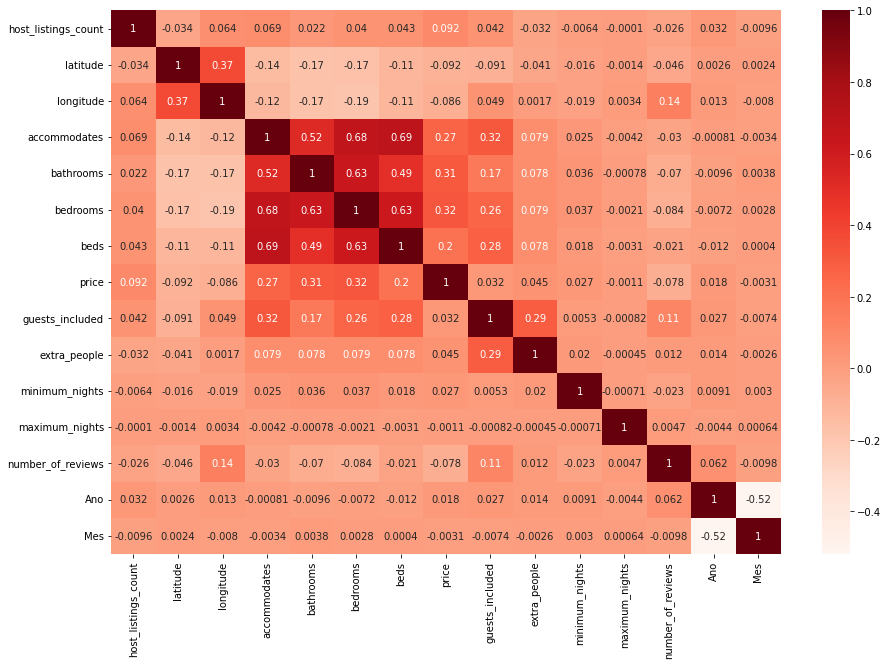

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(data_base.corr(), annot=True, cmap='Reds')

In [11]:
#Definir as funções para Outliers

def limits(coluna):
    q1 = coluna.quantile(0.25)#primeiro quartil 
    q3 = coluna.quantile(0.75)#terceiro quartil
    amplitude = q3 - q1
    return q1 - 1.5*amplitude, q3 + 1.5*amplitude #limite inferior, limite superior respectivamente

def excluir_outliers(df, nome_coluna):
    qtde_linhas = df.shape[0]#conta a quantidade de linhas totais
    lim_inf, lim_sup = limits(df[nome_coluna]) # atribui os limites superior e inverior baseado na função limits
    df = df.loc[(df[nome_coluna] >= lim_inf) & (df[nome_coluna] <= lim_sup), :]#localiza o valor outliers em cadad linha e remove
    linhas_removidas = qtde_linhas - df.shape[0]
    return df, linhas_removidas


In [12]:
#testando o funcionamento da função
print(limits(data_base['price']))

(-524.0, 1276.0)


In [13]:
from matplotlib.pyplot import hist
from pandas import value_counts


def diagrama_caixa(coluna):
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(15,5)
    sns.boxplot(x=coluna, ax=ax1)
    ax2.set_xlim(limits(coluna))
    sns.boxplot(x=coluna, ax=ax2)

def histograma(coluna):
    plt.figure(figsize=(15,5))
    sns.distplot(coluna, hist=True)

def grafico_barra(coluna):
    plt.figure(figsize=(15,5))
    ax = sns.barplot(x=coluna.value_counts().index, y=coluna.value_counts())
    ax.set_xlim(limits(coluna))

In [14]:
#tentando os resultados 
data_base['host_listings_count'].value_counts()

1.0       482731
2.0       150115
3.0        60806
4.0        34810
5.0        21675
           ...  
77.0           1
1145.0         1
116.0          1
485.0          1
329.0          1
Name: host_listings_count, Length: 193, dtype: int64

### Price

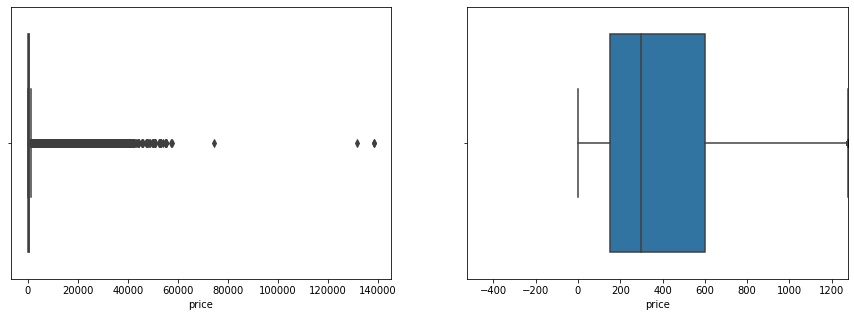

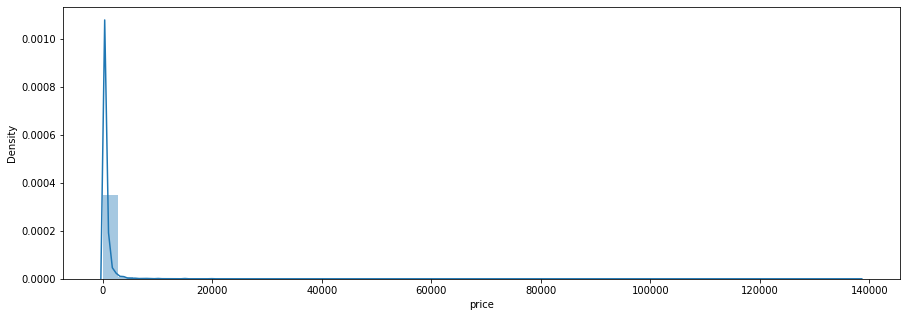

In [15]:
diagrama_caixa(data_base['price'])
histograma(data_base['price'])

In [16]:
data_base, linhas_removidas = excluir_outliers(data_base, 'price')
print(f'{linhas_removidas} linhas removidas')

87282 linhas removidas


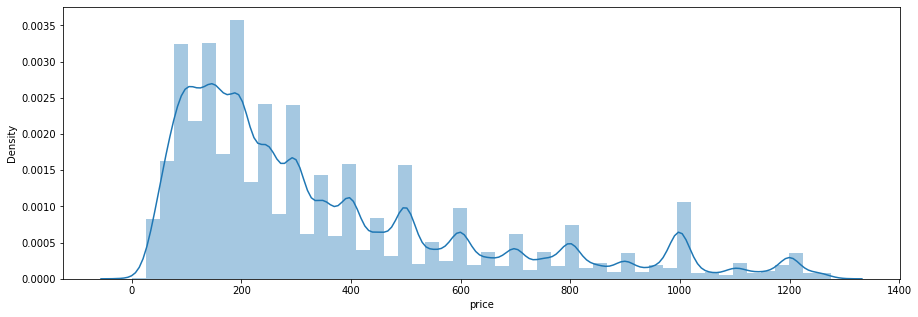

In [17]:
histograma(data_base['price'])

### Extra people

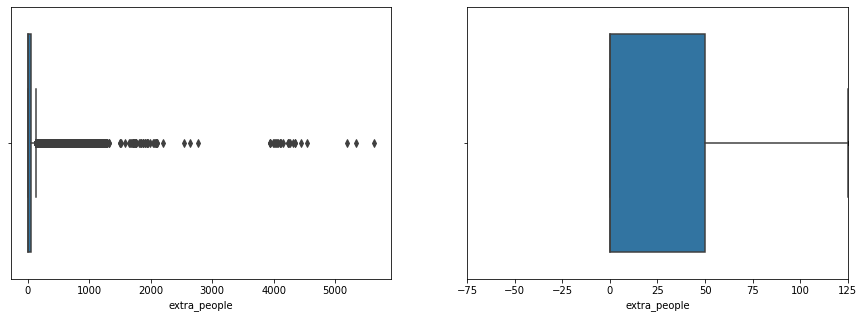

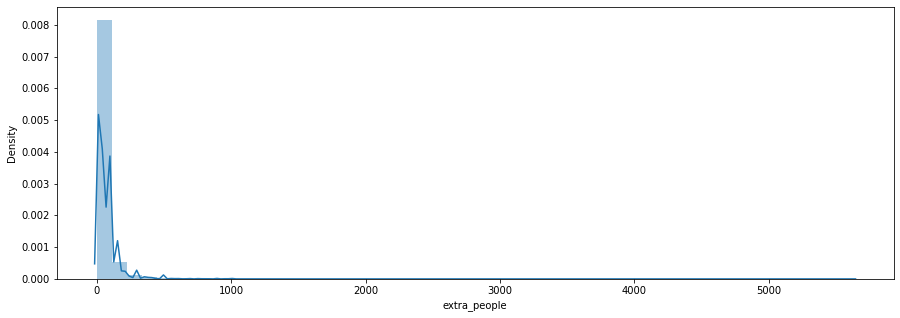

In [18]:
diagrama_caixa(data_base['extra_people'])
histograma(data_base['extra_people'])

In [19]:
data_base, linhas_removidas = excluir_outliers(data_base, 'extra_people')
print(f'{linhas_removidas} linhas removidas')

59194 linhas removidas


(751233, 23)


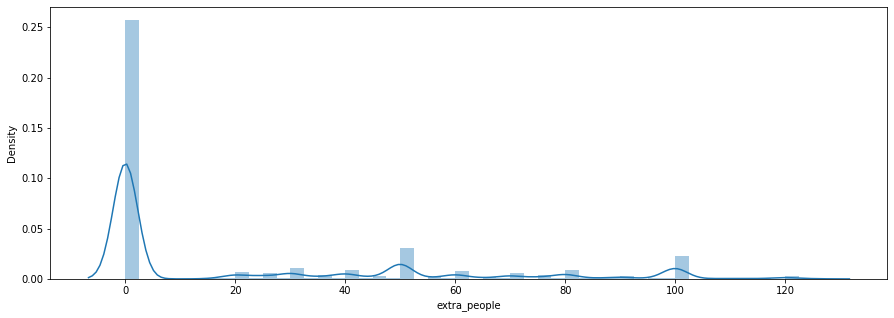

In [20]:
histograma(data_base['extra_people'])
print(data_base.shape)

### host_listings_count

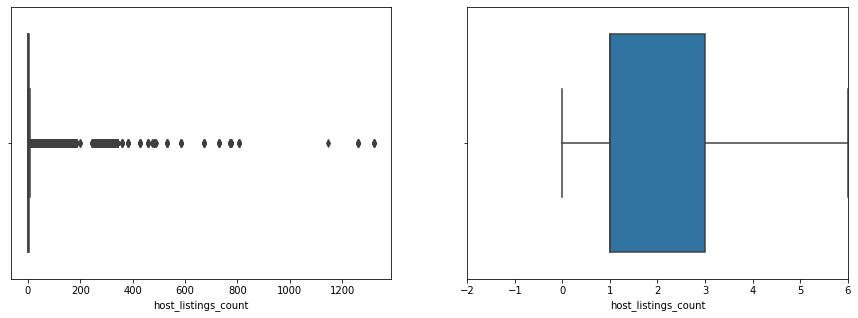

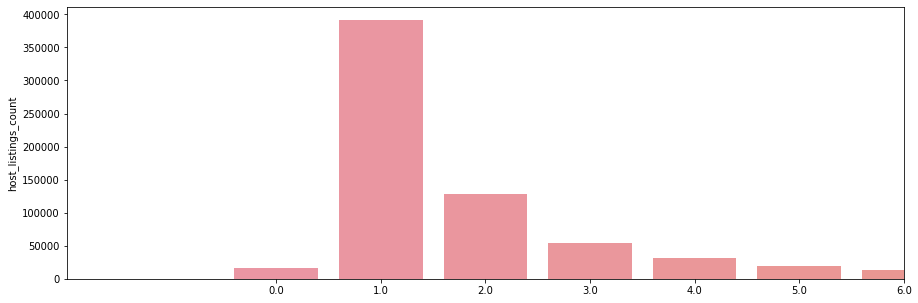

In [21]:
diagrama_caixa(data_base['host_listings_count'])
grafico_barra(data_base['host_listings_count'])

Podemos excluir os outliers, porque não é o objetivo do projeto analisar hosts com mais de 6 imóveis 

In [22]:
data_base, linhas_removidas = excluir_outliers(data_base, 'host_listings_count')
print(f'{linhas_removidas} linhas removidas')

97723 linhas removidas


### accommodates

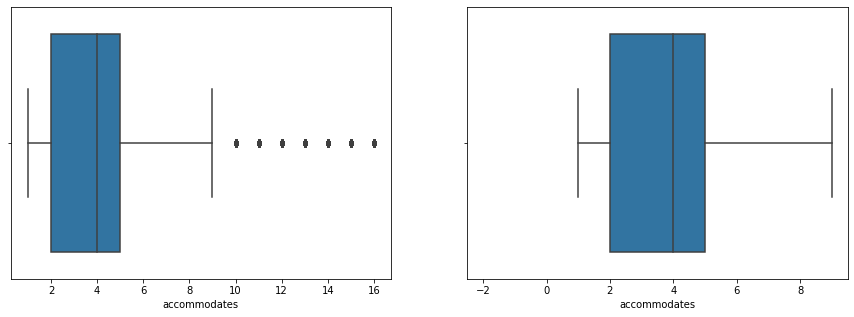

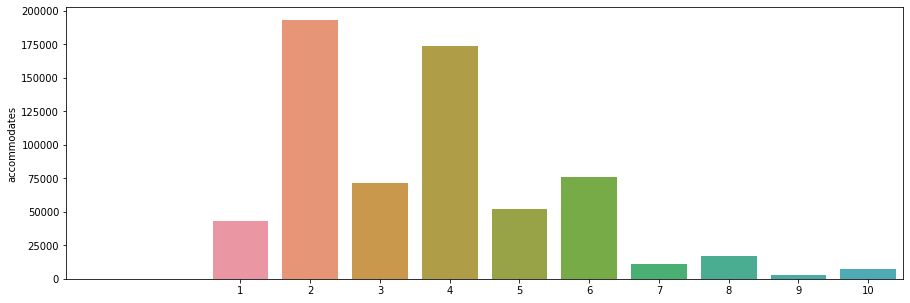

In [23]:
diagrama_caixa(data_base['accommodates'])
grafico_barra(data_base['accommodates'])

In [24]:
data_base, linhas_removidas = excluir_outliers(data_base, 'accommodates')
print(f'{linhas_removidas} linhas removidas')

13146 linhas removidas


### bathrooms 

<AxesSubplot:ylabel='bathrooms'>

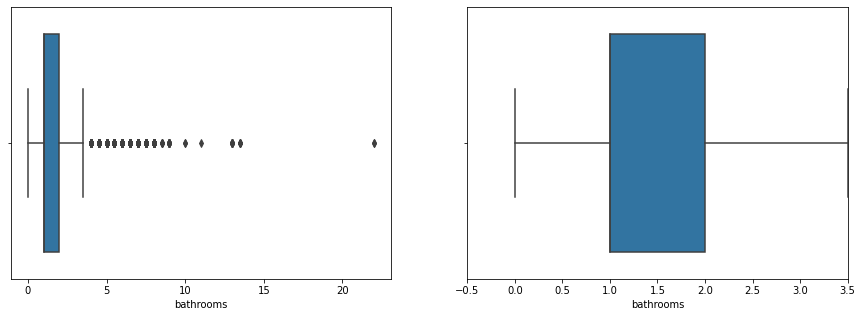

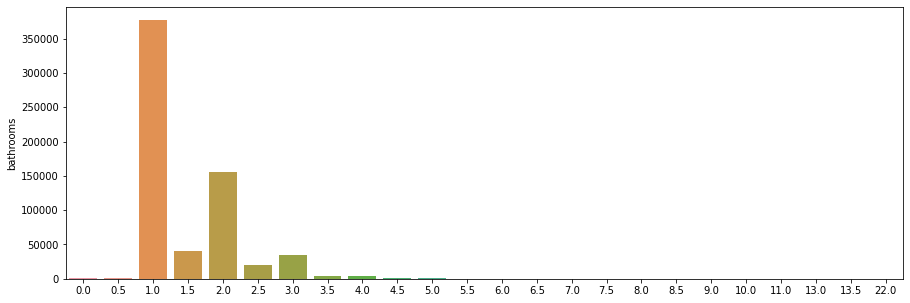

In [25]:
diagrama_caixa(data_base['bathrooms'])
#grafico_barra(data_base['bathrooms'])
plt.figure(figsize=(15,5))
sns.barplot(x=data_base['bathrooms'].value_counts().index, y=data_base['bathrooms'].value_counts())


In [26]:
data_base, linhas_removidas = excluir_outliers(data_base, 'bathrooms')
print(f'{linhas_removidas} linhas removidas')

6894 linhas removidas


### bedrooms

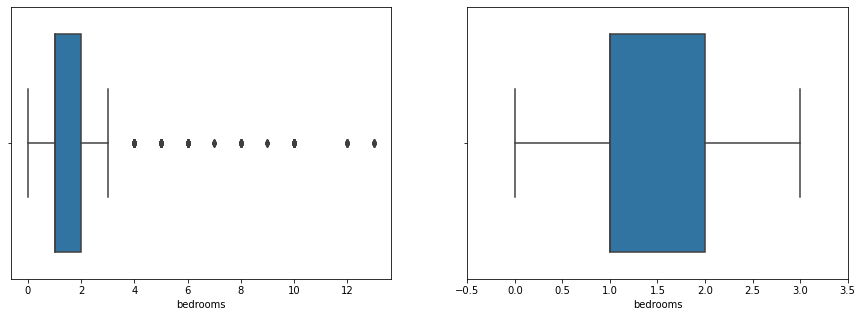

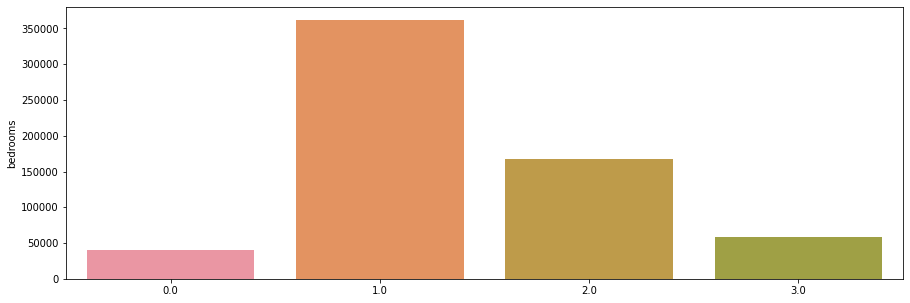

In [27]:
diagrama_caixa(data_base['bedrooms'])
grafico_barra(data_base['bedrooms'])

In [28]:
data_base, linhas_removidas = excluir_outliers(data_base, 'bedrooms')
print(f'{linhas_removidas} linhas removidas')

5482 linhas removidas


### beds

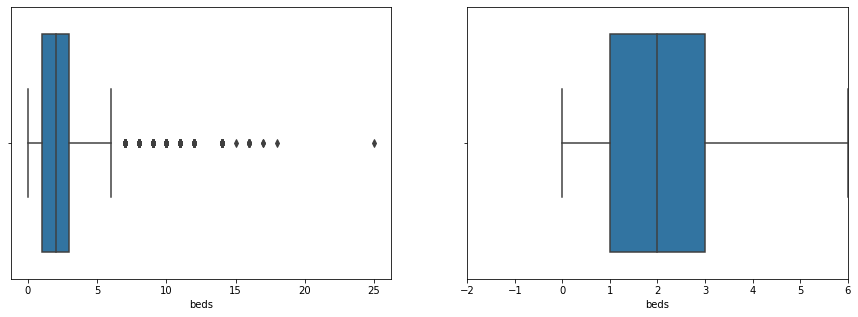

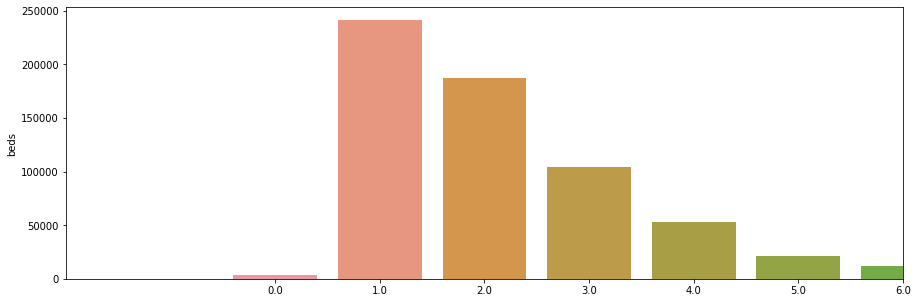

In [29]:
diagrama_caixa(data_base['beds'])
grafico_barra(data_base['beds'])

In [30]:
data_base, linhas_removidas = excluir_outliers(data_base, 'beds')
print(f'{linhas_removidas} linhas removidas')

5622 linhas removidas


guests_included será removido da alnalise

### minimum_nights

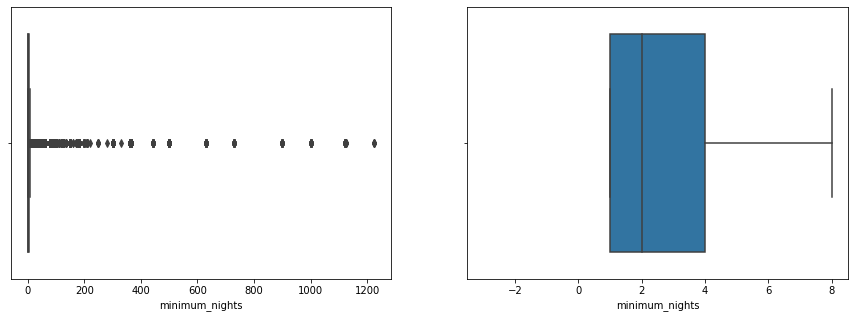

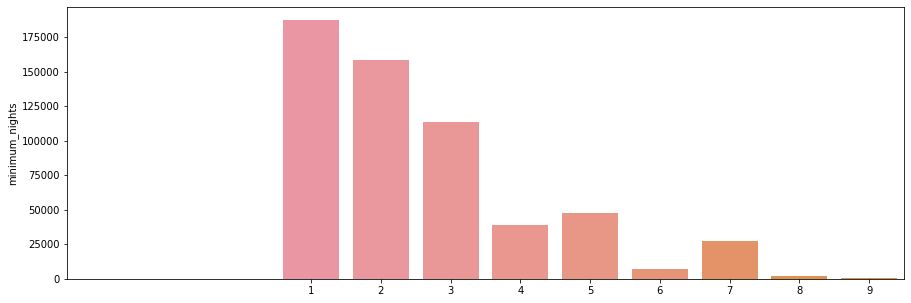

In [31]:
diagrama_caixa(data_base['minimum_nights'])
grafico_barra(data_base['minimum_nights'])

In [32]:
data_base, linhas_removidas = excluir_outliers(data_base, 'minimum_nights')
print(f'{linhas_removidas} linhas removidas')

40383 linhas removidas


### maximum_nights fora da analise

In [33]:
data_base = data_base.drop('maximum_nights', axis=1)
data_base.shape

(581983, 22)

### number_of_reviews será removido da analise

In [34]:
data_base = data_base.drop('number_of_reviews', axis=1)
data_base.shape

(581983, 21)

### Tratamento de cololunas de calorres de texto

### property_type

Apartment                 458354
House                      51387
Condominium                26456
Serviced apartment         12671
Loft                       12352
Guest suite                 3621
Bed and breakfast           3472
Hostel                      2665
Guesthouse                  2155
Other                       1957
Villa                       1294
Townhouse                    969
Aparthotel                   693
Chalet                       481
Earth house                  468
Tiny house                   457
Boutique hotel               447
Hotel                        376
Casa particular (Cuba)       298
Cottage                      230
Bungalow                     207
Dorm                         185
Cabin                        141
Nature lodge                 124
Castle                        80
Treehouse                     76
Island                        54
Boat                          53
Hut                           40
Campsite                      34
Resort    

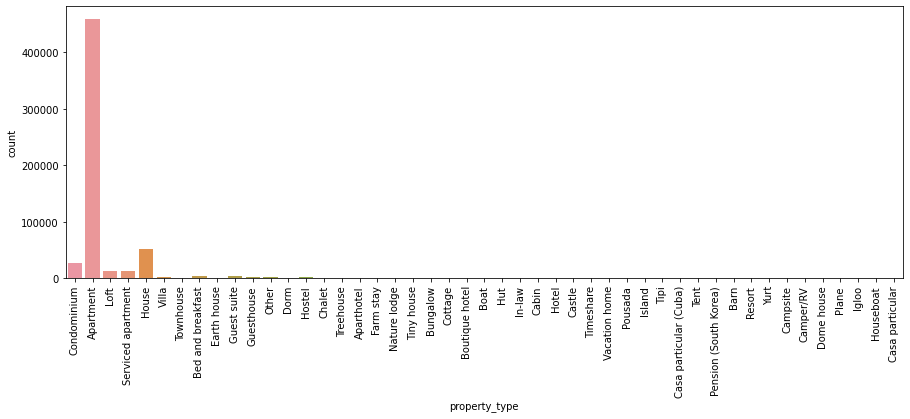

In [35]:
print(data_base['property_type'].value_counts())

plt.figure(figsize=(15,5))
grafico = sns.countplot('property_type', data=data_base)
grafico.tick_params(axis='x', rotation=90)

In [36]:
tabela_tipos_casas = data_base['property_type'].value_counts()
colunas_agrupar = []

for tipo in tabela_tipos_casas.index:
    if tabela_tipos_casas[tipo] < 2000:
        colunas_agrupar.append(tipo)
print(colunas_agrupar)

for tipo in colunas_agrupar:
    data_base.loc[data_base['property_type']==tipo, 'property_type'] = 'Outros'

print(data_base['property_type'].value_counts())

['Other', 'Villa', 'Townhouse', 'Aparthotel', 'Chalet', 'Earth house', 'Tiny house', 'Boutique hotel', 'Hotel', 'Casa particular (Cuba)', 'Cottage', 'Bungalow', 'Dorm', 'Cabin', 'Nature lodge', 'Castle', 'Treehouse', 'Island', 'Boat', 'Hut', 'Campsite', 'Resort', 'Camper/RV', 'Yurt', 'Tent', 'Tipi', 'Barn', 'Farm stay', 'Pension (South Korea)', 'Dome house', 'Igloo', 'In-law', 'Vacation home', 'Timeshare', 'Pousada', 'Houseboat', 'Casa particular', 'Plane']
Apartment             458354
House                  51387
Condominium            26456
Serviced apartment     12671
Loft                   12352
Outros                  8850
Guest suite             3621
Bed and breakfast       3472
Hostel                  2665
Guesthouse              2155
Name: property_type, dtype: int64


Apartment             458354
House                  51387
Condominium            26456
Serviced apartment     12671
Loft                   12352
Outros                  8850
Guest suite             3621
Bed and breakfast       3472
Hostel                  2665
Guesthouse              2155
Name: property_type, dtype: int64


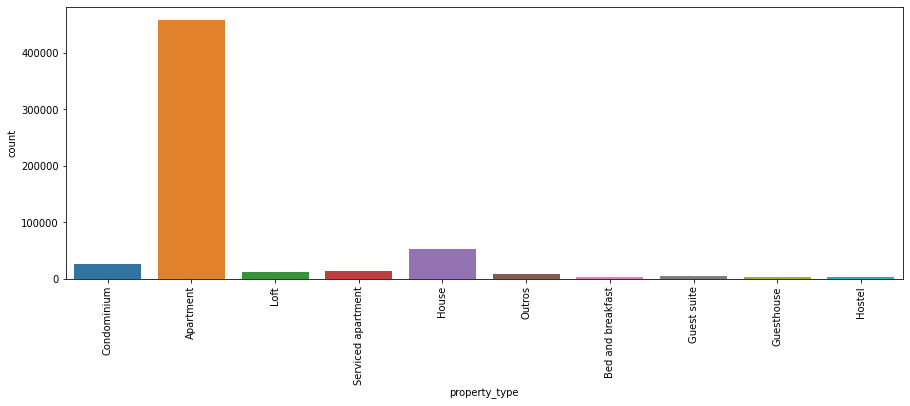

In [37]:
print(data_base['property_type'].value_counts())

plt.figure(figsize=(15,5))
grafico = sns.countplot('property_type', data=data_base)
grafico.tick_params(axis='x', rotation=90)

### room_type

Entire home/apt    372443
Private room       196859
Shared room         11714
Hotel room            967
Name: room_type, dtype: int64


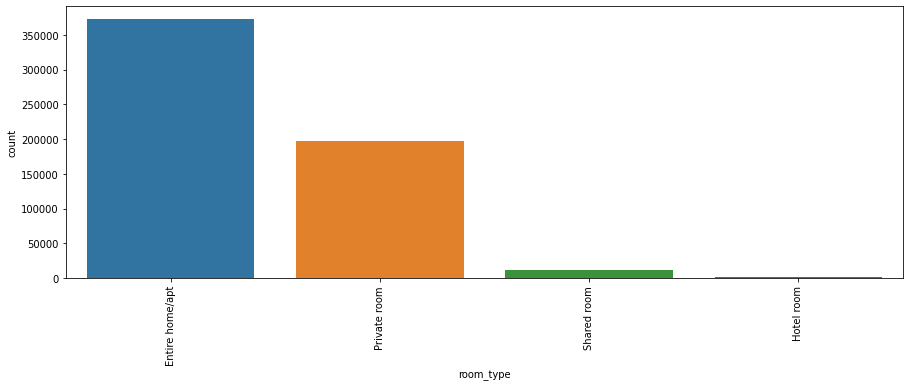

In [38]:
print(data_base['room_type'].value_counts())

plt.figure(figsize=(15,5))
grafico = sns.countplot('room_type', data=data_base)
grafico.tick_params(axis='x', rotation=90)

### bed_type

Real Bed         570643
Pull-out Sofa      8055
Futon              1634
Airbed             1155
Couch               496
Name: bed_type, dtype: int64
['Pull-out Sofa', 'Futon', 'Airbed', 'Couch']
Real Bed    570643
Outros       11340
Name: bed_type, dtype: int64
Real Bed    570643
Outros       11340
Name: bed_type, dtype: int64


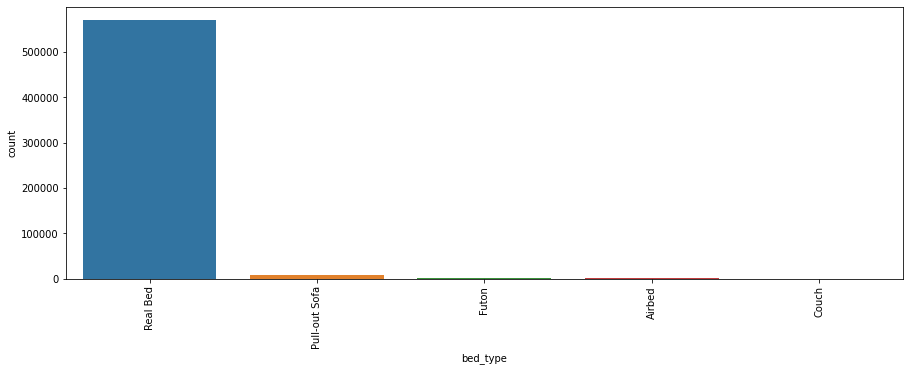

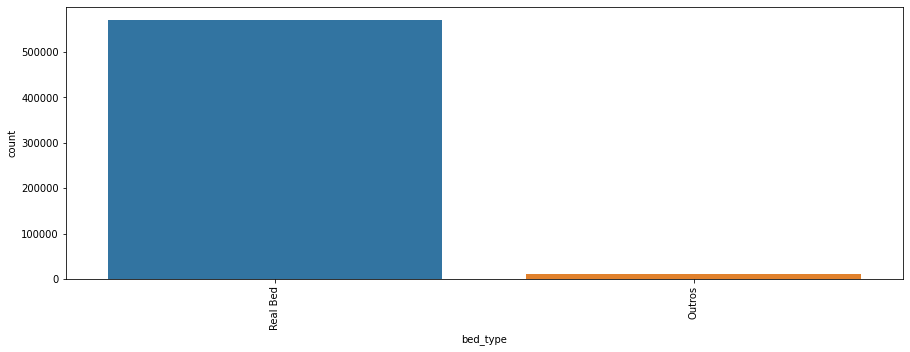

In [39]:
print(data_base['bed_type'].value_counts())

plt.figure(figsize=(15,5))
grafico = sns.countplot('bed_type', data=data_base)
grafico.tick_params(axis='x', rotation=90)


#agrupando categorias de bed_types
tabela_bed_types = data_base['bed_type'].value_counts()
colunas_agrupar = []

for tipo in tabela_bed_types.index:
    if tabela_bed_types[tipo] < 10000:
        colunas_agrupar.append(tipo)
print(colunas_agrupar)

for tipo in colunas_agrupar:
    data_base.loc[data_base['bed_type']==tipo, 'bed_type'] = 'Outros'

print(data_base['bed_type'].value_counts())
print(data_base['bed_type'].value_counts())

plt.figure(figsize=(15,5))
grafico = sns.countplot('bed_type', data=data_base)
grafico.tick_params(axis='x', rotation=90)

### cancellation_policy 

flexible                       258096
strict_14_with_grace_period    200743
moderate                       113281
strict                           9696
super_strict_60                   135
super_strict_30                    32
Name: cancellation_policy, dtype: int64


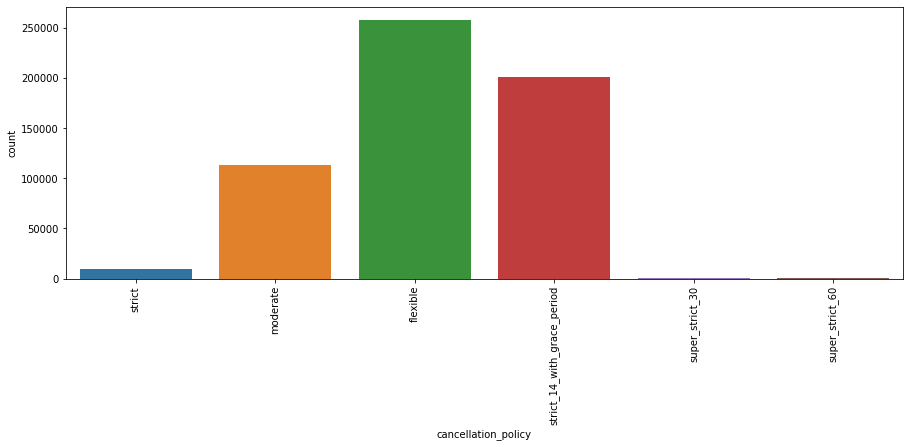

In [40]:
print(data_base['cancellation_policy'].value_counts())

plt.figure(figsize=(15,5))
grafico = sns.countplot('cancellation_policy', data=data_base)
grafico.tick_params(axis='x', rotation=90)

### amenities

In [41]:
print(data_base['amenities'].iloc[1].split(','))
print(len(data_base['amenities'].iloc[1].split(',')))

data_base['n_amenities'] = data_base['amenities'].astype(str).str.split(',').apply(len)

['{TV', '"Cable TV"', 'Internet', 'Wifi', '"Air conditioning"', 'Kitchen', 'Doorman', 'Elevator', '"Buzzer/wireless intercom"', '"Family/kid friendly"', 'Hangers', '"Hair dryer"', 'Iron', '"Laptop friendly workspace"}']
14


In [42]:
data_base = data_base.drop('amenities', axis=1)
data_base.shape

(581983, 21)

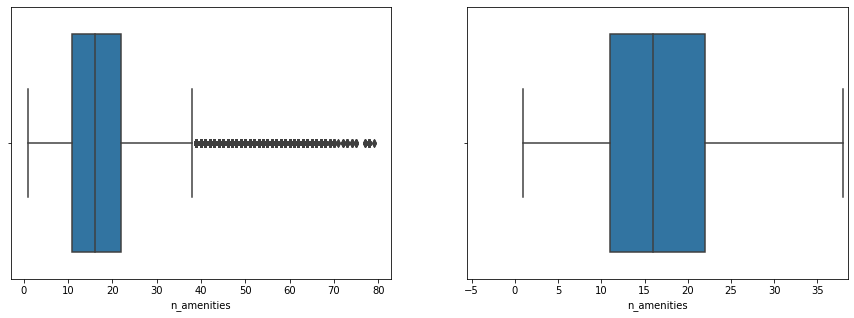

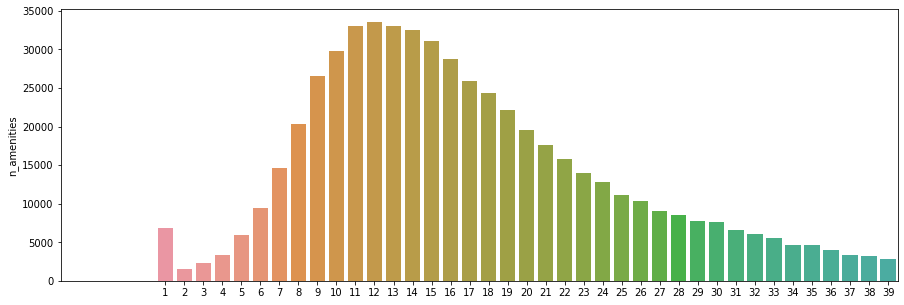

In [43]:
diagrama_caixa(data_base['n_amenities'])
grafico_barra(data_base['n_amenities'])

In [44]:
data_base, linhas_removidas = excluir_outliers(data_base, 'n_amenities')
print(f'{linhas_removidas} linhas removidas')

24343 linhas removidas


### Visualização de Mapas das propriedades

In [45]:
import plotly.express as px

amostra = data_base.sample(n=50000)
centro_mapa = {'lat':amostra.latitude.mean(), 'lon':amostra.longitude.mean()}
mapa = px.density_mapbox(amostra, lat='latitude', lon='longitude', z='price', radius=2.5, center=centro_mapa, zoom=10, mapbox_style='stamen-terrain')

mapa.show()


### Encoding
###### Ajustar as features para facilitar o trabalho do modelo futuro (features de categoria, true e false, etc.)
###### Features de categorias (features em que os valores da coluna são textos) Vamos utilizar o método de encoding de variaveis dummies

In [46]:
colunas_tf = ['host_is_superhost', 'instant_bookable', 'is_business_travel_ready']
data_base_cod = data_base.copy()
for coluna in colunas_tf:
    data_base_cod.loc[data_base_cod[coluna]=='t', coluna] = 1
    data_base_cod.loc[data_base_cod[coluna]=='f', coluna] = 0

In [47]:
colunas_ctg = ['property_type', 'room_type', 'bed_type','cancellation_policy']
data_base_cod = pd.get_dummies(data=data_base_cod, columns=colunas_ctg)

display(data_base_cod.head())

,host_is_superhost,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,...,room_type_Private room,room_type_Shared room,bed_type_Outros,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60
1,1,2.0,-22.965919,-43.178962,5,1.0,2.0,2.0,270.0,2,...,0,0,0,1,0,0,1,0,0,0
3,0,3.0,-22.977117,-43.190454,3,1.0,1.0,2.0,161.0,2,...,0,0,0,1,0,0,1,0,0,0
4,1,1.0,-22.983024,-43.214270,3,1.0,1.0,2.0,222.0,2,...,0,0,0,1,0,0,1,0,0,0
5,1,1.0,-22.988165,-43.193588,3,1.5,1.0,2.0,308.0,2,...,0,0,0,1,0,0,1,0,0,0
6,1,1.0,-22.981269,-43.190457,2,1.0,1.0,2.0,219.0,2,...,0,0,0,1,0,0,1,0,0,0


### Modelo de Previsão

#### Métricas de Avaliação

In [48]:
def avaliar_modelo(nome_modelo, y_teste, previsao):
    r2 = r2_score(y_teste, previsao)
    RSME = np.sqrt(mean_squared_error(y_teste, previsao))
    return f'Modelo {nome_modelo}:\nR²: {r2}\nRSME: {RSME}'

#### Escolha dos modelos a serem testados
 1. RandomForest
 2. LinearRegression
 3. Extra Tree

In [49]:
modelo_rf = RandomForestRegressor()
modelo_lr = LinearRegression()
modelo_et = ExtraTreesRegressor()


modelos = {'RandomForest':modelo_rf,
            'LinearRegression': modelo_lr,
            'ExtraTrees': modelo_et,
            }

y = data_base_cod['price']
x = data_base_cod.drop('price', axis=1)

#### Separação das variáveis em teste e treino

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=10)

for nome_modelo, modelo in modelos.items():
    #treinar
    modelo.fit(x_train, y_train)
    #testar
    previsao = modelo.predict(x_test)
    print(avaliar_modelo(nome_modelo, y_test, previsao))

Modelo RandomForest:
R²: 0.972320853370671
RSME: 44.11746106684103
Modelo LinearRegression:
R²: 0.32967704284912214
RSME: 217.10819144205027
Modelo ExtraTrees:
R²: 0.9755060743380507
RSME: 41.50145860656116


### Análise do Melhor Modelo

[1.26184628e-02 3.87672831e-02 1.00485373e-01 9.85350179e-02
 7.41093472e-02 7.44671801e-02 1.10016586e-01 5.14396094e-02
 1.99418489e-02 8.33964036e-02 6.41473317e-02 2.18703580e-02
 0.00000000e+00 1.08663056e-02 4.58008432e-03 8.63026992e-02
 1.27219392e-02 1.30501480e-03 5.19738531e-03 6.36606813e-04
 9.38859743e-04 6.13875804e-04 7.11858399e-03 2.17241027e-03
 2.34931428e-03 2.26391494e-03 6.17196448e-02 3.21503431e-04
 4.23205119e-03 1.78536031e-03 2.58852491e-03 2.69076205e-03
 1.88077659e-02 1.22024087e-02 7.57178147e-04 7.81593415e-03
 7.71420413e-05 1.39928135e-04]
Index(['host_is_superhost', 'host_listings_count', 'latitude', 'longitude',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included',
       'extra_people', 'minimum_nights', 'instant_bookable',
       'is_business_travel_ready', 'Ano', 'Mes', 'n_amenities',
       'property_type_Apartment', 'property_type_Bed and breakfast',
       'property_type_Condominium', 'property_type_Guest suite',
       'p

,0
bedrooms,0.110017
latitude,0.100485
longitude,0.098535
n_amenities,0.086303
extra_people,0.083396
bathrooms,0.074467
accommodates,0.074109
minimum_nights,0.064147
room_type_Entire home/apt,0.061720
beds,0.051440


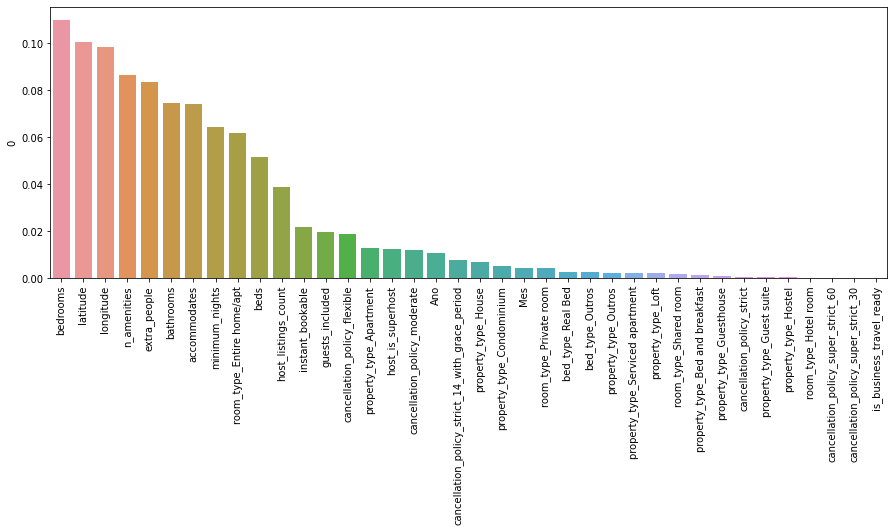

In [51]:
print(modelo_et.feature_importances_)
print(x_train.columns)
impotancia_features = pd.DataFrame(modelo_et.feature_importances_, x_train.columns)
impotancia_features = impotancia_features.sort_values(by=0, ascending=False)
display(impotancia_features)
plt.figure(figsize=(15,5))
ax = sns.barplot(x=impotancia_features.index, y=impotancia_features[0])
ax.tick_params(axis='x', rotation=90)

### A justes finais no modelo
- Todas as colunas com impacto inferior a 1% será removida para uma reavaliação
- O modelo escoilhido até o momento apresentava os seguintes valores
Modelo ExtraTrees:
R²: 0.9756026052679416
RSME: 41.41959893772192

### Ajustes e Melhorias no Melhor Modelo

In [52]:
display(data_base_cod.head())

,host_is_superhost,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,...,room_type_Private room,room_type_Shared room,bed_type_Outros,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60
1,1,2.0,-22.965919,-43.178962,5,1.0,2.0,2.0,270.0,2,...,0,0,0,1,0,0,1,0,0,0
3,0,3.0,-22.977117,-43.190454,3,1.0,1.0,2.0,161.0,2,...,0,0,0,1,0,0,1,0,0,0
4,1,1.0,-22.983024,-43.214270,3,1.0,1.0,2.0,222.0,2,...,0,0,0,1,0,0,1,0,0,0
5,1,1.0,-22.988165,-43.193588,3,1.5,1.0,2.0,308.0,2,...,0,0,0,1,0,0,1,0,0,0
6,1,1.0,-22.981269,-43.190457,2,1.0,1.0,2.0,219.0,2,...,0,0,0,1,0,0,1,0,0,0


In [53]:
data_base_cod = data_base_cod.drop(['is_business_travel_ready','cancellation_policy_super_strict_30','cancellation_policy_super_strict_60',
'room_type_Hotel room', 'property_type_Hostel', 'property_type_Guest suite','cancellation_policy_strict', 'property_type_Guesthouse'], axis=1)

y = data_base_cod['price']
x = data_base_cod.drop('price', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=10)


modelo_et.fit(x_train, y_train)
previsao = modelo_et.predict(x_test)
print(avaliar_modelo('ExtraTree', y_test, previsao))

Modelo ExtraTree:
R²: 0.9756150442420531
RSME: 41.40903873217552


### Deploy do Projeto
- Passo 1 -> Criar arquivo do modelo escolhido (joblib)
- Passo 2 -> Escolher a forma de deploy
    - Arquivo Executável + Tkinter
    - Deploy em um Microsite (Flask)
    - Deploy apenas para uso direto (Streamlit)
- Passo 3 -> Outro arquivo Python (Pode ser Jupiter ou PyCharm)
- Passo 4 -> Importar Streamlit e criar codigo
- Passo 5 -> Atribuir ao botão carregamento do modelo
- Passo 6 -> Deploy feito

In [54]:
x['price'] = y
x.to_csv('dados.csv')


In [55]:
import joblib
joblib.dump(modelo_et, 'modelo.joblib')

['modelo.joblib']